In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import six
import sys
sys.modules['sklearn.externals.six'] = six
import seaborn as sns
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.metrics import log_loss
from imblearn.metrics import geometric_mean_score
import warnings
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from scipy import stats
from sklearn import model_selection
#from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingClassifier
import os
filename = "cardio_train.csv"
headers = ["id","age","gender","height","weight","ap_hi","ap_lo","cholestrol","gluc","smoke","alco","active","cardio"]
df = pd.read_csv(filename, names = headers)   
    

In [2]:
# To see what the data set looks like, we'll use the head() method.
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholestrol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80           1     1      0   
1   1  20228       1     156    85.0    140     90           3     1      0   
2   2  18857       1     165    64.0    130     70           3     1      0   
3   3  17623       2     169    82.0    150    100           1     1      0   
4   4  17474       1     156    56.0    100     60           1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [3]:
data = df.values
# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 12) (70000,)
(35000, 12) (35000, 12) (35000,) (35000,)


In [4]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
# function initializing baseline machine learning models
accuracy=[]
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('DT' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    names = []
    results = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5,shuffle=True, random_state=7)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f" % (name, cv_results.mean())
        accuracy.append(cv_results.mean())
        print(msg)
         
        
    return results,msg

In [5]:
models = GetBasedModel()
names,results= BasedLine2(X_train, y_train,models)


LR_L2: 0.695086
LDA: 0.644400
KNN7: 0.558800
KNN5: 0.551943
KNN9: 0.561486
KNN11: 0.565514
DT: 0.632657
NB: 0.562743
AB: 0.728571
GBM: 0.734086
RF_Ent100: 0.723800
RF_Gini100: 0.722286
ET100: 0.713286
ET500: 0.715200
MLP: 0.544743
SGD3000: 0.561543
ET1000: 0.714686


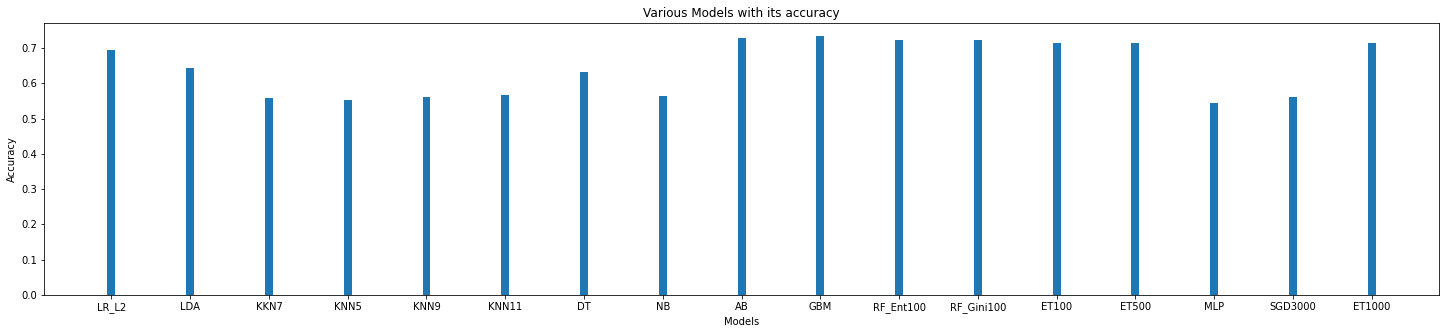

In [19]:
import matplotlib.pyplot as plt
models=['LR_L2','LDA','KKN7','KNN5','KNN9','KNN11','DT','NB','AB','GBM','RF_Ent100','RF_Gini100','ET100','ET500','MLP','SGD3000','ET1000']
plt.bar(models,accuracy,width=0.1)
plt.title("Various Models with its accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.rcParams["figure.figsize"] = [25, 5]
plt.show()

In [33]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)
print('Final prediction score: [%.3f]' % accuracy_score(y_test, y_pred_rfe))

Final prediction score: [0.725]


In [21]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

In [23]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [22]:
et_500 = ExtraTreesClassifier(n_estimators= 500)
et_500.fit(X_train,y_train)
y_pred_et500 = et_500.predict(X_test)

In [24]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)

In [25]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [26]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

In [27]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [31]:
stackingclf=StackingClassifier(classifiers=[gbm,ada],meta_classifier=rf_ent)

In [34]:
for iterclf,iterlabel in zip([rf_ent,gbm,ada,et_500,stackingclf],["Random Forest Model","Gradient Boosting Model","Ada Boost Model","Extra Tree Classifier","Stacking Classifier Model"]):
  scores=model_selection.cross_val_score(iterclf,X_train,y_train,cv=3,scoring="accuracy")
  print("Accuracy: %0.3f [%s]" %(scores.mean(),iterlabel))

Accuracy: 0.723 [Random Forest Model]
Accuracy: 0.733 [Gradient Boosting Model]
Accuracy: 0.729 [Ada Boost Model]
Accuracy: 0.714 [Extra Tree Classifier]
Accuracy: 0.733 [Stacking Classifier Model]
